## Gaussian Mixtures

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

In [3]:
import matplotlib.pyplot as plt

In [4]:
#make_blobs: generate isotropic Gaussian blobs for clustering.

In [5]:
#make_blobs: n_samples: if int, it is the total number of points equally divided among clusters. 

In [6]:
#make_blobs: n_features (default=2): number of features for each sample.

In [7]:
#make_blobs: centers: number of centers to generate, or the fixed center locations.

In [8]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
#projection on two vectors (column matrices)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))  #dot product of two matrices = matrix multiplication X1*C
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)  #
X2 = X2 + [6, -8]  #translation operation on X2
X = np.r_[X1, X2]  #concatenation: row-wise merging; concatenate along row (first) axis.
#y = np.r_[y1, y2]  #concatenation: row-wise merging; caution label assignment: 3 clusters should have 3 different labels; y2 should be replaced with y2+2.
y = np.r_[y1, y2+2]  #test: 3 clusters with 3 different labels;

###### start: inspect data

##### final dataset

In [9]:
X.shape, y.shape, np.unique(y)

((1250, 2), (1250,), array([0, 1, 2]))

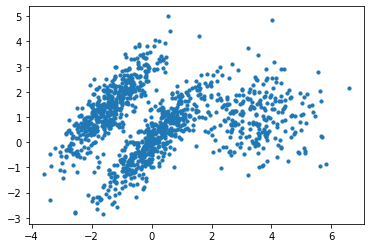

In [10]:
plt.scatter(X[:, 0], X[:, 1], s=10)   #final dataset with three clusters

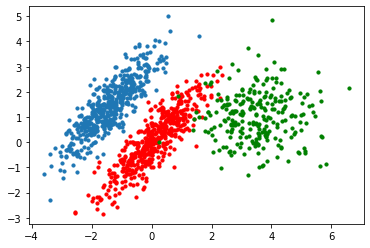

In [11]:
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=10)   #final dataset with labels
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=10, c='r')   #final dataset with labels
plt.scatter(X[y==2][:, 0], X[y==2][:, 1], s=10, c='g')   #test: final dataset with labels

###### end: inspect data

## plot Gaussian Mixture

In [12]:
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]  #consider only centroids with high weights
    plt.scatter(centroids[:, 0], centroids[:, 1],  #coordinates x,y of centroids
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],  #coordinates x,y of centroids
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])  #return -log(p(x)): log(p(x))=negative with p(x)=[0,1]
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,  #contour areas; Z = -log(p(x)) 
                 norm=LogNorm(vmin=1.0, vmax=30.0),  #used to normalize Z to the range of 0-1 on a log scale
                 #norm=LogNorm(vmin=Z.min(), vmax=Z.max()),
                 levels=np.logspace(0, 2, 12))  #draw contour lines at the specified levels; 10**(index*step_size)
    plt.contour(xx, yy, Z,  #contour lines
                norm=LogNorm(vmin=1.0, vmax=30.0),  #used to normalize Z to the range of 0-1 on a log scale
                #norm=LogNorm(vmin=Z.min(), vmax=Z.max()),
                levels=np.logspace(0, 2, 12),  #draw contour lines at the specified levels; 10**(index*step_size)
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])  #hard cluster assignments
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

## Variational Bayesian Gaussian Mixtures

In [13]:
from sklearn.mixture import BayesianGaussianMixture

In [14]:
bgm = BayesianGaussianMixture(n_components=9, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=9, n_init=10, random_state=42)

In [15]:
np.round(bgm.weights_, 2)

array([0.4, 0.2, 0.4, 0. , 0. , 0. , 0. , 0. , 0. ])

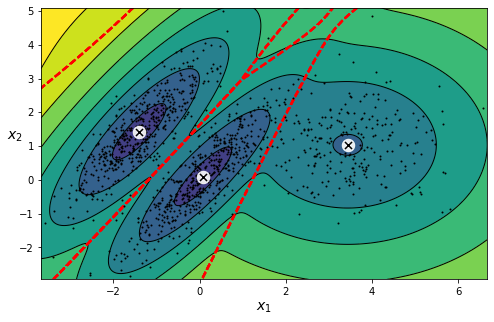

In [16]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

### dataset with  2 moon-shaped clusters

In [17]:
from sklearn.datasets import make_moons

In [18]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [19]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [20]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

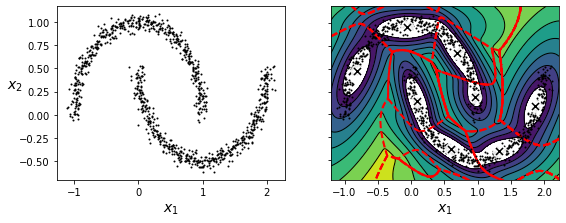

In [21]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()